# Modeling Notebook with Balanced Dataset

In [56]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn import linear_model, utils, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import nltk
from nltk.corpus import stopwords
import string

import multiprocessing
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence, TaggedDocument

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
from utils import *


In [13]:
train = pickle.load(open("../pickle/train_bal.pickle", "rb"))
val = pickle.load(open("../pickle/val_bal.pickle", "rb"))

In [3]:
train.head()
train.columns = ['tweet', 'target']

In [4]:
train.target.value_counts()

0    17514
1     8838
Name: target, dtype: int64

In [5]:
val.columns = ['tweet', 'target']
val.head()

,tweet,target
0,"[pakistan, wear, black, band, oppose, israel, ...",1
1,"[winner, popular, vote, russian, conspiracy, r...",1
2,"[girl, fucktrump]",1
3,"[iphone, pocket, scratchy, things, scratch, sc...",1
4,"[beyonc, trash]",1


In [7]:
train.tweet = train.tweet.apply(lambda x: str(x)[1:-1]) 
val.tweet = val.tweet.apply(lambda x: str(x)[1:-1]) 

X_tr = train.tweet
X_val = val.tweet
y_tr = train.target
y_val = val.target

vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

Train Accuracy:  0.9189814814814815
Val Accuracy:  0.895066413662239
Train F1:  0.8643152208452494
Val F1:  0.8193400849395622
Train ROC-AUC:  0.961930672059514
Val ROC-AUC:  0.9393149311262187
Train Recall:  0.7694048427245983
Vali Recall:  0.7096774193548387
Train Precision:  0.9859359141655792
Val Precision:  0.9690880989180835
Train PR-AUC:  0.9553774007585114
Val PR-AUC:  0.9256200246945678


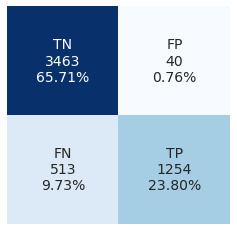

In [8]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_tr = nb.predict(tfidf_tr)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_nb_tr, y_pr_nb_val, nb)

## Random Forest Classifier

Train Accuracy:  0.9981785063752276
Val Accuracy:  0.9206831119544592
Train F1:  0.9972850678733032
Val F1:  0.8759643916913947
Train ROC-AUC:  0.9998801398541077
Val ROC-AUC:  0.9619349636603824
Train Recall:  0.997510749038244
Vali Recall:  0.8353140916808149
Train Precision:  0.9970594888034381
Val Precision:  0.9207735495945103
Train PR-AUC:  0.9997737174247101
Val PR-AUC:  0.9495586118972613


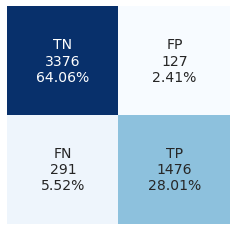

In [9]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_tr = rf.predict(tfidf_tr)
y_pr_rf_val = rf.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_rf_tr, y_pr_rf_val, rf)

## Logistic Regression

Train Accuracy:  0.9552216150576807
Val Accuracy:  0.9240986717267552
Train F1:  0.9305473808122425
Val F1:  0.8815165876777252
Train ROC-AUC:  0.9802501773837128
Val ROC-AUC:  0.9655929972546775
Train Recall:  0.8944331296673456
Vali Recall:  0.8421052631578947
Train Precision:  0.9697006869479883
Val Precision:  0.9247980111870727
Train PR-AUC:  0.9759206773971545
Val PR-AUC:  0.9553816390623809


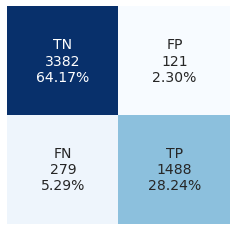

In [10]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_tr = log.predict(tfidf_tr)
y_pr_log_val = log.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_log_tr, y_pr_log_val, log)

In [19]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_tr)
y_pr_svc_tr = svc.predict(tfidf_tr)
y_pr_svc_val = svc.predict(tfidf_val)
get_metriks_2(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_svc_tr, y_pr_svc_val, svc)

Train Accuracy:  0.9793564055859137
Val Accuracy:  0.9199240986717268
Train F1:  0.9686527601705658
Val F1:  0.8764637002341921
Train Recall:  0.9510070151618013
Val Recall:  0.8471986417657046
Train Precision:  0.9869657116016909
Val Precision:  0.9078229229836264
Train PR-AUC:  0.9924076476490923
Val PR-AUC:  0.9522252790009231


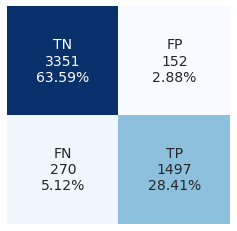

In [20]:
get_confusion(y_val, y_pr_svc_val)

Train Accuracy:  0.9186399514268366
Val Accuracy:  0.9064516129032258
Train F1:  0.8833514689880305
Val F1:  0.8660690029883183
Train ROC-AUC:  0.9738547603064543
Val ROC-AUC:  0.9626276353633986
Train Recall:  0.9185336048879837
Vali Recall:  0.9020939445387662
Train Precision:  0.850765038775938
Val Precision:  0.832810867293626
Train PR-AUC:  0.9485876591554758
Val PR-AUC:  0.9368466957386047


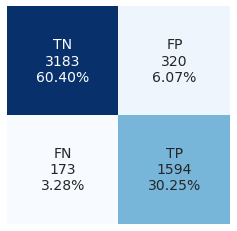

In [22]:
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr, y_tr)
y_pr_abc_tr = abc.predict(tfidf_tr)
y_pr_abc_val = abc.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_abc_tr, y_pr_abc_val, abc)

## Gradient Boosting

Train Accuracy:  0.8785291438979964
Val Accuracy:  0.8768500948766603
Train F1:  0.7813673929376409
Val F1:  0.7778158165011982
Train ROC-AUC:  0.9520396420070164
Val ROC-AUC:  0.9473500036592453
Train Recall:  0.6472052500565739
Vali Recall:  0.6428975664968873
Train Precision:  0.9856970532483198
Val Precision:  0.9844020797227037
Train PR-AUC:  0.9055393278214292
Val PR-AUC:  0.8983322481114175


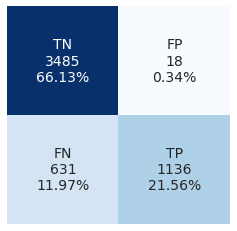

In [16]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_tr)
y_pr_gbc_tr = gbc.predict(tfidf_tr)
y_pr_gbc_val = gbc.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_gbc_tr, y_pr_gbc_val, gbc)

In [59]:
data = {'Accuracy': [accuracy(y_val, y_pr_nb_val), 
                     accuracy(y_val, y_pr_rf_val), 
                     accuracy(y_val, y_pr_log_val), 
                     accuracy(y_val, y_pr_svc_val),
                     accuracy(y_val, y_pr_abc_val),
                     accuracy(y_val, y_pr_gbc_val)],
        'F1 Score': [f1(y_val, y_pr_nb_val), 
                     f1(y_val, y_pr_rf_val), 
                     f1(y_val, y_pr_log_val), 
                     f1(y_val, y_pr_svc_val),
                     f1(y_val, y_pr_abc_val),
                     f1(y_val, y_pr_gbc_val)],
        'Recall': [recall(y_val, y_pr_nb_val), 
                   recall(y_val, y_pr_rf_val), 
                   recall(y_val, y_pr_log_val),
                   recall(y_val, y_pr_svc_val),
                   recall(y_val, y_pr_abc_val),
                   recall(y_val, y_pr_gbc_val)],
        'Precision': [precision(y_val, y_pr_nb_val), 
                      precision(y_val, y_pr_rf_val), 
                      precision(y_val, y_pr_log_val),
                      precision(y_val, y_pr_svc_val),
                      precision(y_val, y_pr_abc_val),
                      precision(y_val, y_pr_gbc_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb),
                   aps(tfidf_val, y_val, rf),
                   aps(tfidf_val, y_val, log),
                   aps2(tfidf_val, y_val, svc),
                   aps(tfidf_val, y_val, abc),
                   aps(tfidf_val, y_val, gbc)]}
metrics5 = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Logistic Regression',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [24]:
metrics5.to_csv("../data/metrics5.csv")
metrics5

,Accuracy,F1 Score,Recall,Precision,PR AUC
Multinomial Naive Bayes,0.895066,0.819340,0.709677,0.969088,0.925620
Random Forest,0.920683,0.875964,0.835314,0.920774,0.949559
Logistic Regression,0.924099,0.881517,0.842105,0.924798,0.955382
Support Vector Machine,0.919924,0.876464,0.847199,0.907823,0.952225
AdaBoost Classifier,0.906452,0.866069,0.902094,0.832811,0.936847
Gradient Boosting Classifier,0.876850,0.777816,0.642898,0.984402,0.898332


In [ ]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)


In [35]:
test = pickle.load(open("../pickle/test_bal.pickle", "rb"))
test.head()


,tweet,label
0,"[people, faggot, like, bear, way, big, douche,...",1
1,"[far, girls, team, female, team, place, major,...",1
2,"[legally, force, parenthood]",1
3,"[simple, trumpisatraitor]",1
4,"[punishment, rapists, hang, till, death, publi...",1


In [36]:

test.tweet = test.tweet.apply(lambda x: str(x)[1:-1]) 
X_tt = test.tweet
y_tt = test.label
tfidf_tt = vec.transform(X_tt)


In [37]:
y_pr_nb_tt = nb.predict(tfidf_tt)
y_pr_rf_tt = rf.predict(tfidf_tt)
y_pr_log_tt = log.predict(tfidf_tt)
y_pr_svc_tt = svc.predict(tfidf_tt)
y_pr_abc_tt = abc.predict(tfidf_tt)
y_pr_gbc_tt = gbc.predict(tfidf_tt)


In [51]:
get_metric(tfidf_tt, y_tt, y_pr_nb_tt, nb)

Accuracy:  0.8924608819345662
F1:  0.816147859922179
Recall:  0.7116200169635284
Precision:  0.9566704675028507
PR-AUC:  0.9284791828333587


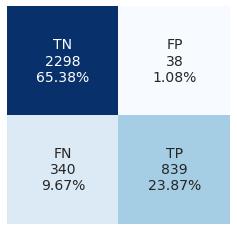

In [38]:
get_confusion(y_tt, y_pr_nb_tt)

In [52]:
get_metric(tfidf_tt, y_tt, y_pr_rf_tt, rf)

Accuracy:  0.9263157894736842
F1:  0.8865527814279457
Recall:  0.8583545377438507
Precision:  0.9166666666666666
PR-AUC:  0.9569217658490307


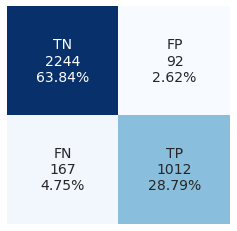

In [39]:
get_confusion(y_tt, y_pr_rf_tt)

In [53]:
get_metric(tfidf_tt, y_tt, y_pr_log_tt, log)

Accuracy:  0.9345661450924608
F1:  0.9
Recall:  0.8778625954198473
Precision:  0.9232827832292596
PR-AUC:  0.962600992860457


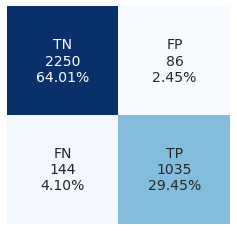

In [40]:
get_confusion(y_tt, y_pr_log_tt)

In [57]:
get_metric2(tfidf_tt, y_tt, y_pr_svc_tt, svc)

Accuracy:  0.928022759601707
F1:  0.8909952606635071
Recall:  0.8770144189991518
Precision:  0.9054290718038529
PR-AUC:  0.9580938672008195


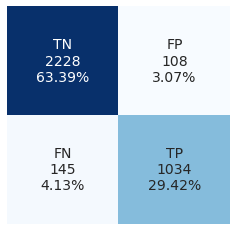

In [41]:
get_confusion(y_tt, y_pr_svc_tt)

In [54]:
get_metric(tfidf_tt, y_tt, y_pr_abc_tt, abc)

Accuracy:  0.910099573257468
F1:  0.8732959101844427
Recall:  0.9236641221374046
Precision:  0.8281368821292776
PR-AUC:  0.9403283740917995


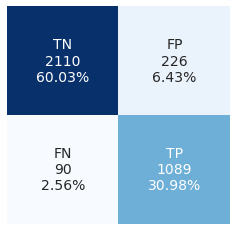

In [42]:
get_confusion(y_tt, y_pr_abc_tt)

In [55]:
get_metric(tfidf_tt, y_tt, y_pr_gbc_tt, gbc)

Accuracy:  0.8793741109530583
F1:  0.7862903225806452
Recall:  0.6615776081424937
Precision:  0.968944099378882
PR-AUC:  0.907682424201905


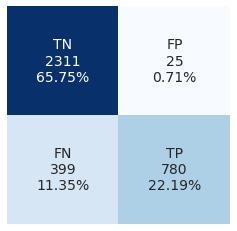

In [43]:
get_confusion(y_tt, y_pr_gbc_tt)

In [60]:
data6 = {'Accuracy': [accuracy(y_tt, y_pr_nb_tt), 
                     accuracy(y_tt, y_pr_rf_tt), 
                     accuracy(y_tt, y_pr_log_tt), 
                     accuracy(y_tt, y_pr_svc_tt),
                     accuracy(y_tt, y_pr_abc_tt),
                     accuracy(y_tt, y_pr_gbc_tt)],
        'F1 Score': [f1(y_tt, y_pr_nb_tt), 
                     f1(y_tt, y_pr_rf_tt), 
                     f1(y_tt, y_pr_log_tt), 
                     f1(y_tt, y_pr_svc_tt),
                     f1(y_tt, y_pr_abc_tt),
                     f1(y_tt, y_pr_gbc_tt)],
        'Recall': [recall(y_tt, y_pr_nb_tt), 
                   recall(y_tt, y_pr_rf_tt), 
                   recall(y_tt, y_pr_log_tt),
                   recall(y_tt, y_pr_svc_tt),
                   recall(y_tt, y_pr_abc_tt),
                   recall(y_tt, y_pr_gbc_tt)],
        'Precision': [precision(y_tt, y_pr_nb_tt), 
                      precision(y_tt, y_pr_rf_tt), 
                      precision(y_tt, y_pr_log_tt),
                      precision(y_tt, y_pr_svc_tt),
                      precision(y_tt, y_pr_abc_tt),
                      precision(y_tt, y_pr_gbc_tt)],
        'PR AUC': [aps(tfidf_tt, y_tt, nb),
                   aps(tfidf_tt, y_tt, rf),
                   aps(tfidf_tt, y_tt, log),
                   aps2(tfidf_tt, y_tt, svc),
                   aps(tfidf_tt, y_tt, abc),
                   aps(tfidf_tt, y_tt, gbc)]}
metrics6 = pd.DataFrame(data=data6, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Logistic Regression',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [61]:
metrics6.to_csv("../data/metrics6.csv")
metrics6

,Accuracy,F1 Score,Recall,Precision,PR AUC
Multinomial Naive Bayes,0.892461,0.816148,0.711620,0.956670,0.928479
Random Forest,0.926316,0.886553,0.858355,0.916667,0.956922
Logistic Regression,0.934566,0.900000,0.877863,0.923283,0.962601
Support Vector Machine,0.928023,0.890995,0.877014,0.905429,0.958094
AdaBoost Classifier,0.910100,0.873296,0.923664,0.828137,0.940328
Gradient Boosting Classifier,0.879374,0.786290,0.661578,0.968944,0.907682
